In [10]:
from csv import reader
from math import sqrt
import pandas

flag =False

# Load a CSV file
def load_csv(filename):
    dataset = list()
    with open(filename, 'r') as file:
        csv_reader = reader(file)
        for row in csv_reader:
            if not row:
                continue
            dataset.append(row)
    return dataset
 
# Convert string column to float
def str_column_to_float(dataset, column):
    for row in dataset:
        row[column] = float(row[column].strip())
 
# Convert string column to integer
# Call to this function only if the labels are non-numeric
def str_column_to_int(dataset, column):
    class_values = [row[column] for row in dataset]
    unique = set(class_values)
    lookup = dict()
    for i, value in enumerate(unique):
        lookup[value] = i
#         print('[%s] => %d' % (value, i))
    for row in dataset:
        row[column] = lookup[row[column]]
    return lookup
 
# Find the min and max values for each column
def dataset_minmax(dataset):
    minmax = list()
    for i in range(len(dataset[0])):
        col_values = [row[i] for row in dataset]
        value_min = min(col_values)
        value_max = max(col_values)
        minmax.append([value_min, value_max])
    return minmax
 
# Rescale dataset columns to the range 0-1
def normalize_dataset(dataset, minmax):
    for row in dataset:
        for i in range(len(row)):
            row[i] = (row[i] - minmax[i][0]) / (minmax[i][1] - minmax[i][0])
 


In [11]:
# Calculate the Euclidean distance between two vectors
def euclidean_distance(row1, row2):
    distance = 0.0
    for i in range(len(row1)-1):
        distance += (row1[i] - row2[i])**2
    return sqrt(distance)
 
# Locate the most similar neighbors
def get_neighbors(train, test_row, num_neighbors):
    distances = list()
    for train_row in train:
        dist = euclidean_distance(test_row, train_row)
        distances.append((train_row, dist))
    distances.sort(key=lambda tup: tup[1])
    neighbors = list()
    for i in range(num_neighbors):
        neighbors.append(distances[i][0])
    return neighbors
 
# Make a prediction with neighbors
def predict_classification(train, test_row, num_neighbors):
    neighbors = get_neighbors(train, test_row, num_neighbors)
    output_values = [row[-1] for row in neighbors]
    prediction = max(set(output_values), key=output_values.count)
    return prediction
 
# Make a prediction with KNN on the dataset
filename = 'tfidf.csv'
# Skipping the first row as the header row for the datasets
dataset = load_csv(filename)[1:]
for i in range(len(dataset[0])-1):
    str_column_to_float(dataset, i)
    
# convert class column to integers if the label is non-numeric
# lookup_dict = str_column_to_int(dataset, len(dataset[0])-1)
# print(lookup_dict)
# reverse_dict = {v: k for k, v in lookup_dict.items()}
# print(reverse_dict)

# define model parameter i.e. value of K in KNN
num_neighbors = 5
# define a new record
row = [2,4]
# predict the label
label = predict_classification(dataset, row, num_neighbors)
print('Data=%s, Predicted: %s' % (row, label))

Data=[2, 4], Predicted: 3.5


In [12]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix



In [13]:
actual_list= list()
predicted_list = list()
for i in dataset:
    actual_list.append(i[-1])

#     Actual prediction part (Takes a lot of time)
for j in dataset:
    predicted_list.append(predict_classification(dataset, j[:-1], num_neighbors))

In [14]:
print(actual_list[500:508])
print(predicted_list[500:508])

['4', '3.5', '4', '4.5', '4', '2.5', '3', '2.5']
['4', '4', '4', '4', '4', '4', '4', '4']


In [15]:
single = multilabel_confusion_matrix(actual_list, predicted_list)
print(single)

[[[15412  1042]
  [  378    98]]

 [[16304   160]
  [  427    39]]

 [[16606     0]
  [  324     0]]

 [[15754   252]
  [  880    44]]

 [[15990   202]
  [  704    34]]

 [[12630  1400]
  [ 2244   656]]

 [[13698  1237]
  [ 1666   329]]

 [[ 8341  3901]
  [ 2732  1956]]

 [[14087   964]
  [ 1525   354]]

 [[11337  3053]
  [ 1331  1209]]]


In [16]:
results = confusion_matrix(actual_list, predicted_list)
print(results)


[[  98   18    0    2    3   30   31   87    7  200]
 [ 112   39    0   27    6   64   31   94   10   83]
 [  72   12    0    4    7   50   46   64    5   64]
 [ 126   16    0   44   28  164   91  242   24  189]
 [  96    4    0    9   34  118   95  207   26  149]
 [ 202   19    0   84   36  656  204  963  101  635]
 [ 162   39    0   11   42  201  329  699  179  333]
 [ 166   26    0   64   32  435  451 1956  454 1104]
 [  46   14    0   13   33   89  204  830  354  296]
 [  60   12    0   38   15  249   84  715  158 1209]]


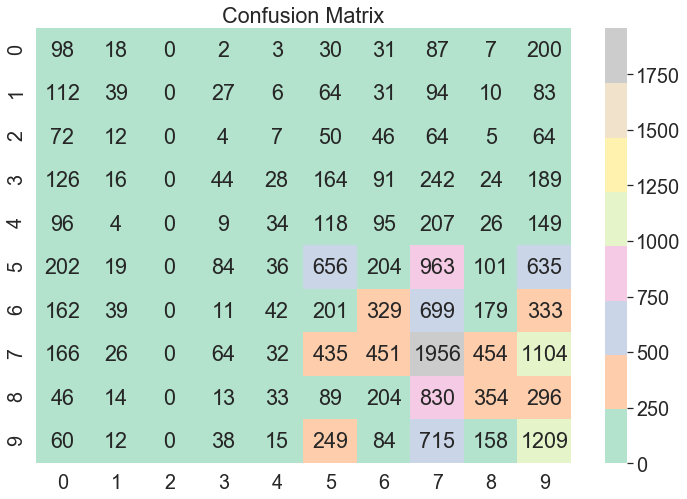

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(font_scale =1.8)
plt.figure(figsize = [12,8])
plt.title("Confusion Matrix")
sns.heatmap(results,annot=True,fmt = 'd',cbar=True, cmap ="Pastel2")
# plt.savefig('confusion.png')

In [21]:
# to show in jupyter notebook
from sklearn.metrics import classification_report
average_scores = classification_report(actual_list, predicted_list)
print(average_scores)

              precision    recall  f1-score   support

         0.5       0.09      0.21      0.12       476
           1       0.20      0.08      0.12       466
         1.5       0.00      0.00      0.00       324
           2       0.15      0.05      0.07       924
         2.5       0.14      0.05      0.07       738
           3       0.32      0.23      0.26      2900
         3.5       0.21      0.16      0.18      1995
           4       0.33      0.42      0.37      4688
         4.5       0.27      0.19      0.22      1879
           5       0.28      0.48      0.36      2540

    accuracy                           0.28     16930
   macro avg       0.20      0.19      0.18     16930
weighted avg       0.27      0.28      0.26     16930



D:\Anaconda3\envs\jobwebrec\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import pandas as pd
average_scores = classification_report(actual_list, predicted_list, output_dict=True)
df = pd.DataFrame(average_scores).transpose()
df.to_csv("classification_report_tf_idf.csv")